In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [199]:
#loading data set
housing = pd.read_csv('train.csv')

In [200]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [201]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [202]:
# Data Cleaning
#Check for null values
null = housing.isna().sum()

In [203]:
null.sort_values(ascending = False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [204]:
housing['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [205]:
# There are some columns have null values which have some meaning
cols = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1']

In [206]:
# those Null values means no facility available so fill those null values as 'NONE'
for i in cols:
    housing[i].fillna('NONE',inplace = True)

In [207]:
#Again Check for null values
housing.isnull().sum().sort_values(ascending=False)

LotFrontage    259
GarageYrBlt     81
MasVnrType       8
MasVnrArea       8
Electrical       1
              ... 
ExterCond        0
ExterQual        0
Exterior2nd      0
Exterior1st      0
SalePrice        0
Length: 81, dtype: int64

In [208]:
#Remaining null values have no meaning so dropping those records
housing = housing[~(housing['MasVnrType'].isnull())]

In [209]:
housing = housing[~(housing['MasVnrArea'].isnull())]

In [210]:
housing = housing[~(housing['Electrical'].isnull())]

In [211]:
housing = housing[~(housing['LotFrontage'].isnull())]

In [212]:
housing = housing[~(housing['GarageYrBlt'].isnull())]

In [213]:
#Again checking for null values
housing.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [214]:
housing['house_age'] = housing['YrSold'] - housing['YearBuilt']

In [215]:
housing['house_age'].head()

0     5
1    31
2     7
3    91
4     8
Name: house_age, dtype: int64

In [216]:
housing.drop(['YrSold','YearBuilt'],axis = 1, inplace = True)

In [217]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,house_age
0,1,60,RL,65.0,8450,Pave,NONE,Reg,Lvl,AllPub,...,0,NONE,NONE,NONE,0,2,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NONE,Reg,Lvl,AllPub,...,0,NONE,NONE,NONE,0,5,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NONE,IR1,Lvl,AllPub,...,0,NONE,NONE,NONE,0,9,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NONE,IR1,Lvl,AllPub,...,0,NONE,NONE,NONE,0,2,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NONE,IR1,Lvl,AllPub,...,0,NONE,NONE,NONE,0,12,WD,Normal,250000,8


In [218]:
#Id column is not necessary so dropping the Id column
housing.drop('Id',axis = 1, inplace = True)

In [219]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,house_age
0,60,RL,65.0,8450,Pave,NONE,Reg,Lvl,AllPub,Inside,...,0,NONE,NONE,NONE,0,2,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,NONE,Reg,Lvl,AllPub,FR2,...,0,NONE,NONE,NONE,0,5,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,NONE,IR1,Lvl,AllPub,Inside,...,0,NONE,NONE,NONE,0,9,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,NONE,IR1,Lvl,AllPub,Corner,...,0,NONE,NONE,NONE,0,2,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,NONE,IR1,Lvl,AllPub,FR2,...,0,NONE,NONE,NONE,0,12,WD,Normal,250000,8


In [220]:
#Checking for data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1120 non-null   int64  
 1   MSZoning       1120 non-null   object 
 2   LotFrontage    1120 non-null   float64
 3   LotArea        1120 non-null   int64  
 4   Street         1120 non-null   object 
 5   Alley          1120 non-null   object 
 6   LotShape       1120 non-null   object 
 7   LandContour    1120 non-null   object 
 8   Utilities      1120 non-null   object 
 9   LotConfig      1120 non-null   object 
 10  LandSlope      1120 non-null   object 
 11  Neighborhood   1120 non-null   object 
 12  Condition1     1120 non-null   object 
 13  Condition2     1120 non-null   object 
 14  BldgType       1120 non-null   object 
 15  HouseStyle     1120 non-null   object 
 16  OverallQual    1120 non-null   int64  
 17  OverallCond    1120 non-null   int64  
 18  YearRemo

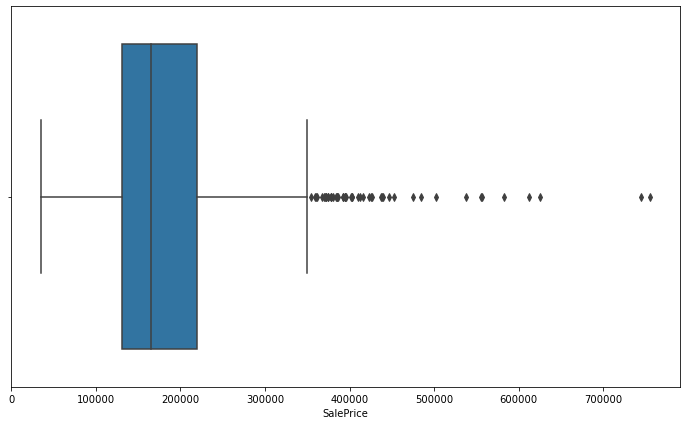

In [221]:
#Checking for outliers in target column
plt.figure(figsize = (12,7))
sns.boxplot(housing['SalePrice'])
plt.show()
#There are some outliers present

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

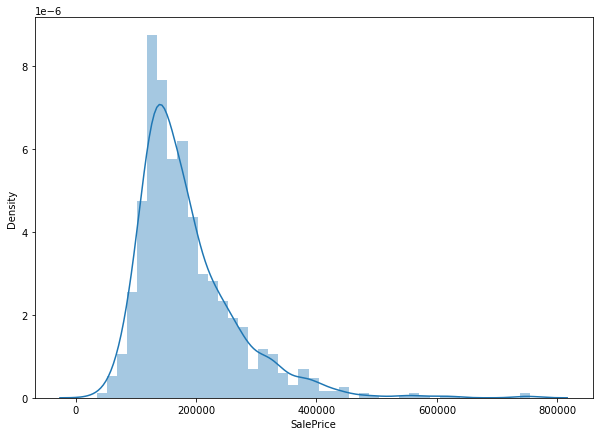

In [222]:
#Checking for target variable
plt.figure(figsize = (10,7))
sns.distplot(housing['SalePrice'])
#As we can see values are not norally disrtibuted

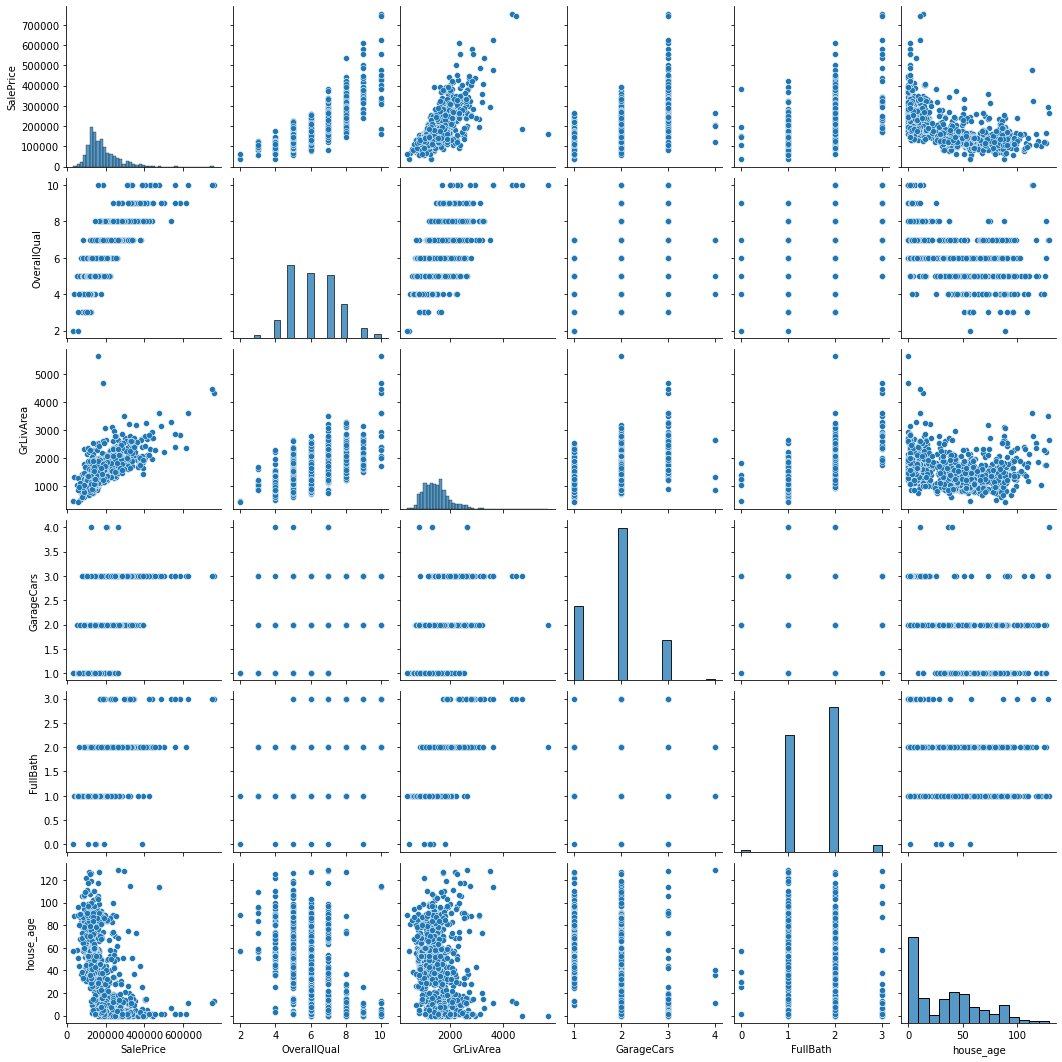

In [223]:
#Checking for linear relations
sns.pairplot(housing[['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'FullBath','house_age']])
plt.show()

In [224]:
#Extracting all the numeric columns
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])

In [225]:
housing_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,house_age
0,60,65.0,8450,7,5,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,208500,5
1,20,80.0,9600,6,8,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,181500,31
2,60,68.0,11250,7,5,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,223500,7
3,70,60.0,9550,7,5,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,140000,91
4,60,84.0,14260,8,5,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,250000,8


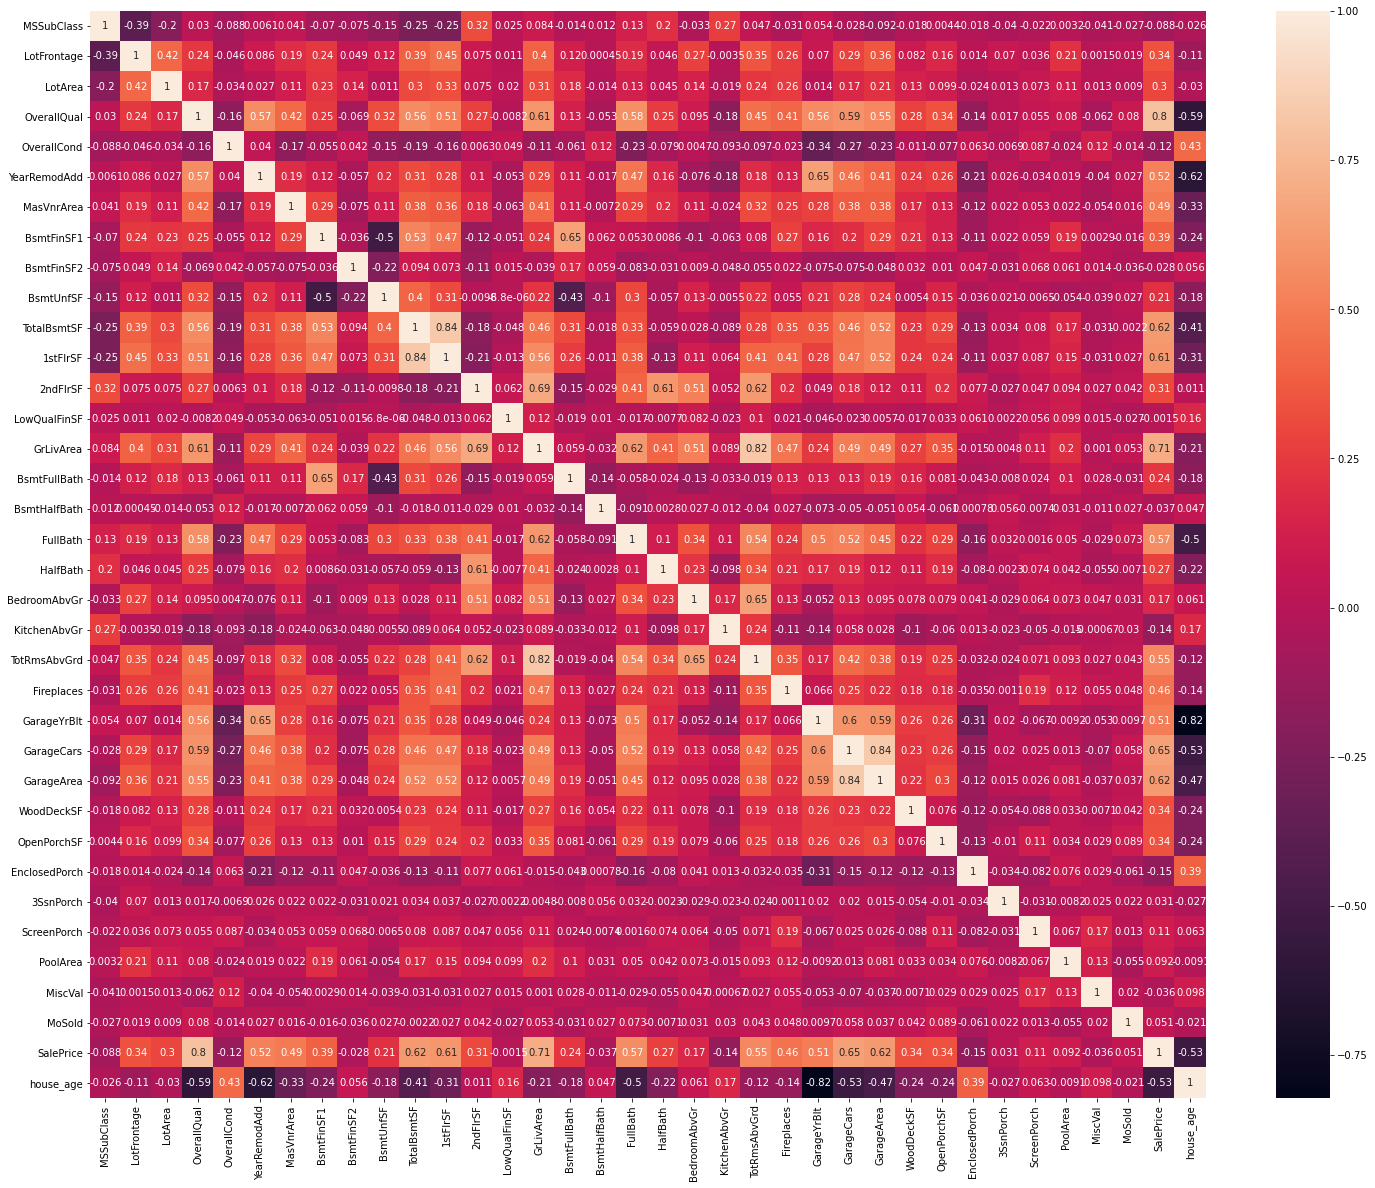

In [226]:
#Checking for correlation between all the numeric variables
plt.figure(figsize = (25,20))
sns.heatmap(housing_numeric.corr(), annot = True)
plt.show()
# AS we can see sales price is highly correlated with some factors like overall quality,total basement, Grliving area etc.

In [227]:
#Data Prepration
#Extracting Categorical Variables
housing_cat = housing.select_dtypes(include=['object'])

In [228]:
housing_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NONE,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NONE,NONE,NONE,WD,Normal
1,RL,Pave,NONE,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NONE,NONE,NONE,WD,Normal
2,RL,Pave,NONE,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NONE,NONE,NONE,WD,Normal
3,RL,Pave,NONE,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NONE,NONE,NONE,WD,Abnorml
4,RL,Pave,NONE,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NONE,NONE,NONE,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NONE,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NONE,NONE,NONE,WD,Normal
1456,RL,Pave,NONE,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NONE,MnPrv,NONE,WD,Normal
1457,RL,Pave,NONE,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NONE,GdPrv,Shed,WD,Normal
1458,RL,Pave,NONE,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NONE,NONE,NONE,WD,Normal


In [229]:
#creating dummy variables
dummy = pd.get_dummies(housing_cat, drop_first = True)

In [230]:
dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NONE,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [231]:
#concating dummies and main data frame
housing_final = pd.concat([housing,dummy], axis = 1)

In [232]:
housing_final.drop(housing_cat, axis = 1, inplace = True)

In [233]:
housing_final.shape

(1120, 245)

In [234]:
housing_final.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,...,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,56.125000,70.663393,10123.302679,6.213393,5.561607,1985.664286,108.584821,438.791071,44.629464,594.313393,...,0.002679,0.003571,0.103571,0.000893,0.850000,0.000893,0.008036,0.016071,0.805357,0.106250
std,41.785256,24.277552,8132.925949,1.380963,1.068582,21.025704,189.557855,468.410812,157.893600,450.416962,...,0.051709,0.059681,0.304840,0.029881,0.357231,0.029881,0.089321,0.125806,0.396102,0.308295
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7590.000000,5.000000,5.000000,1966.000000,0.000000,0.000000,0.000000,249.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,70.000000,9399.000000,6.000000,5.000000,1995.000000,0.000000,374.500000,0.000000,506.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,80.000000,11361.250000,7.000000,6.000000,2005.000000,170.000000,702.500000,0.000000,840.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [235]:
#Dropping YearRemodAdd column
housing_final.drop(['YearRemodAdd'], axis = 1, inplace = True)

In [236]:
housing_final.shape

(1120, 244)

In [237]:
#Transformation
# As we saw earlier SalePrice is not normally distributed as it is not distributed normally it will affect our prediction we need to transform it
housing_final['Trans_SalePrice'] = np.log(housing_final['SalePrice'])

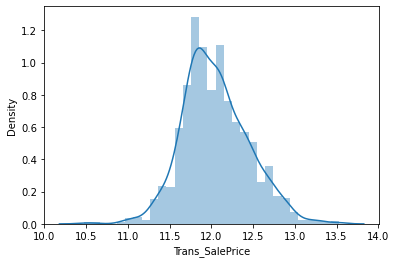

In [238]:
#Checking for distribution
sns.distplot(housing_final['Trans_SalePrice'])
plt.show()
#Its looks good now

In [239]:
housing_final.drop('SalePrice', axis = 1, inplace = True)

In [240]:
#Modeling
#Train-test split
from sklearn.model_selection import train_test_split

In [241]:
y = housing_final.pop('Trans_SalePrice')

In [242]:
X = housing_final

In [243]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: Trans_SalePrice, dtype: float64

In [256]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size= 0.3, random_state= 100)

In [257]:
#Scaling of data
from sklearn.preprocessing import StandardScaler

In [258]:
scaler = StandardScaler()

In [259]:
housing_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'house_age'],
      dtype='object')

In [262]:
scale = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond'
        , 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'house_age']

In [263]:
X_train = scaler.fit_transform(X_train[scale])

In [264]:
X_test = scaler.transform(X_test[scale])

In [265]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [266]:
# Building Ridge regression model
ridge = Ridge()

In [267]:
#Selection of alpha (Lambda)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
        0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
        4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [269]:
#Finding best alpha(Lambda) using cross validation technique
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [270]:
#Best Lambda (Alpha)
print(model_cv.best_params_)

{'alpha': 100}


In [271]:
#Fitting model with best Alpha (Lambda)
alph = 100
ridge = Ridge(alpha= alph)
ridge.fit(X_train,y_train)

Ridge(alpha=100)

In [272]:
#Checking coefficients
ridge.coef_

array([-0.02435078, -0.00402146,  0.01217096,  0.10021122,  0.04729698,
        0.01341212,  0.01247466,  0.00136716,  0.0031366 ,  0.01699532,
        0.03185825,  0.01995343, -0.00151369,  0.04103824,  0.03435657,
        0.00554501,  0.03745525,  0.02133819, -0.00520168, -0.02611324,
        0.03006882,  0.02847195,  0.01570813,  0.04472026,  0.00438121,
        0.01302553,  0.01223205,  0.00078083,  0.01122662,  0.01639974,
       -0.02786977, -0.00315238,  0.01107637, -0.0615121 ])

In [273]:
#Checking performance of model
y_train_pred = ridge.predict(X_train)

In [274]:
from sklearn.metrics import r2_score

In [278]:
print('r2_Score for ridge for training data',r2_score(y_train,y_train_pred))

r2_Score for ridge for training data 0.8570748583071157


In [279]:
#Checking performance on test data set
y_test_pred = ridge.predict(X_test)

In [280]:
print('r2_Score for ridge for training data',r2_score(y_test,y_test_pred))

r2_Score for ridge for training data 0.8506858244280934


In [281]:
#It looks like everything is good as there is negligible difference in r2_score of train and test data sets

In [282]:
#Building Lasso regression model
lasso = Lasso()
model_cv_1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [283]:
#Checking for best alpha(Lambda)
print(model_cv_1.best_params_)

{'alpha': 0.001}


In [284]:
#Fitting model using best alpha
al = 0.001
lasso = Lasso(alpha=al)

In [285]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [288]:
#Checking for coefficients
lasso.coef_

array([-0.02892331, -0.00660931,  0.01208554,  0.11896869,  0.05571924,
        0.00954543,  0.00762317,  0.00012755, -0.        ,  0.00837873,
        0.01754684,  0.        , -0.00049806,  0.07457367,  0.03927179,
        0.00586033,  0.03115055,  0.01770049, -0.00433164, -0.02419777,
        0.02614753,  0.02545644,  0.        ,  0.05103547, -0.        ,
        0.00951804,  0.00995322,  0.00211366,  0.01123684,  0.01704854,
       -0.02991403, -0.00150455,  0.00931657, -0.08323114])

In [286]:
#Checking model performance
y_train_pred_lasso = lasso.predict(X_train)

In [287]:
print('r2_score for train data for Lasso',r2_score(y_train,y_train_pred_lasso))

r2_score for train data for Lasso 0.8605043595481339


In [289]:
#Checking model performance for  test data set
y_test_pred_lasso = lasso.predict(X_test)

In [290]:
print('r2_score for test data for Lasso',r2_score(y_test,y_test_pred_lasso))

r2_score for test data for Lasso 0.8552287782214166


In [ ]:
#It looks good as there is very less difference in test and train performance

In [292]:
#The above model is final model